In [ ]:
# Core
import sys
import pandas as pd
import numpy as np
import os
import time
import math
from datetime import date,datetime,timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
%matplotlib inline

pd.options.mode.chained_assignment = None

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
daily = pd.read_csv('daily_gold_rate.csv')
annual = pd.read_csv('annual_gold_rate.csv')

In [ ]:
daily.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9714 entries, 0 to 9713
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9714 non-null   object 
 1   USD     9714 non-null   float64
 2   EUR     9714 non-null   float64
 3   GBP     9714 non-null   float64
 4   INR     9714 non-null   float64
 5   AED     9714 non-null   float64
 6   CNY     9710 non-null   float64
dtypes: float64(6), object(1)
memory usage: 531.4+ KB


In [ ]:
daily.describe()

,USD,EUR,GBP,INR,AED,CNY
count,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000,9710.000000
mean,756.117006,625.441514,500.862103,39552.116958,2777.031055,4995.334317
std,510.826310,415.971087,375.932133,38595.686908,1876.433314,3385.204958
min,252.800000,222.200000,157.150000,3687.170000,928.530000,809.630000
25%,354.000000,305.272500,219.602500,11601.020000,1298.662500,2189.807500
50%,425.750000,362.995000,259.565000,17068.540000,1563.645000,3312.715000
75%,1235.987500,1017.935000,824.057500,76038.925000,4539.797500,8101.902500
max,2067.150000,1874.560000,1572.810000,156815.690000,7592.950000,14355.530000


In [ ]:
daily = daily.fillna(0)

In [ ]:
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    44 non-null     int64  
 1   USD     44 non-null     float64
 2   EUR     44 non-null     float64
 3   GBP     44 non-null     float64
 4   INR     43 non-null     float64
 5   AED     43 non-null     float64
 6   CNY     37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


In [ ]:
annual.describe()

,Date,USD,EUR,GBP,INR,AED,CNY
count,44.000000,44.000000,44.000000,44.000000,43.000000,43.000000,37.000000
mean,1999.500000,692.055909,571.891313,450.575615,34026.445973,2585.786320,4950.991330
std,12.845233,486.226172,395.398741,357.907845,37476.310663,1783.571654,3377.322124
min,1978.000000,193.440000,124.735800,100.654490,2481.905120,995.506180,926.645180
25%,1988.750000,360.540000,302.387860,215.853185,6423.166690,1327.153290,2243.380520
50%,1999.500000,416.415000,359.622620,249.850690,12788.438900,1557.457900,3306.274890
75%,2010.250000,1176.175000,932.098448,761.273783,64728.547700,4379.206195,8283.158470
max,2021.000000,1798.610000,1549.044710,1378.980990,132967.875100,6606.550460,12205.481970


In [ ]:
annual = annual.fillna(0)
annual

,Date,USD,EUR,GBP,INR,AED,CNY
0,1978,193.44,124.73580,100.65449,0.00000,0.00000,0.00000
1,1979,304.68,185.06142,143.09014,2481.90512,1163.93597,0.00000
2,1980,614.50,378.19461,263.80259,4831.74943,2278.36795,0.00000
3,1981,459.26,360.90588,227.01948,3966.64790,1691.03194,0.00000
4,1982,375.30,345.59742,215.53232,3553.62680,1378.72895,0.00000
5,1983,423.66,439.89318,279.24936,4270.42821,1557.45790,0.00000
6,1984,360.78,425.91000,269.81553,4067.60433,1324.72272,0.00000
7,1985,317.30,394.08922,246.28501,3887.39270,1162.19778,926.64518
8,1986,367.85,351.34774,251.12483,4625.06990,1351.92474,1272.38854
9,1987,446.22,366.06607,272.49236,5761.91787,1641.52338,1659.60015


In [ ]:
# Change to y/m/d date format
daily['Date'] = pd.to_datetime(daily['Date'], format="%Y-%m-%d")

In [ ]:
### For seaborn
def plot_daily_sea_all(currency):
    fig = plt.figure(figsize=(12,6))
    g = sns.lineplot(x='Date', y=f'{currency}', data=daily)
    g.set_title(f"Price of gold of {currency}")
    g.set_xlabel("All time")
    g.set_ylabel(f'{currency}')
    plt.show()

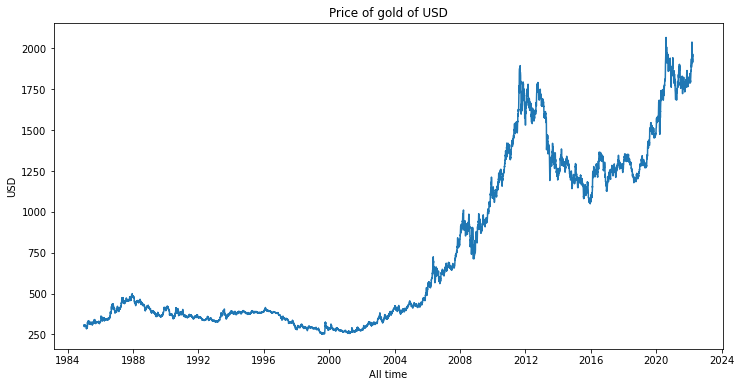

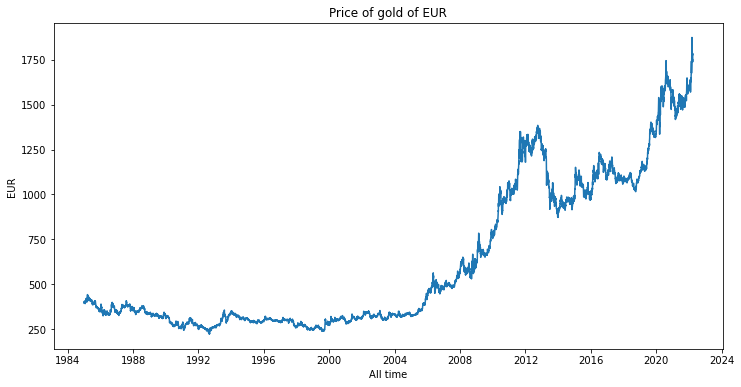

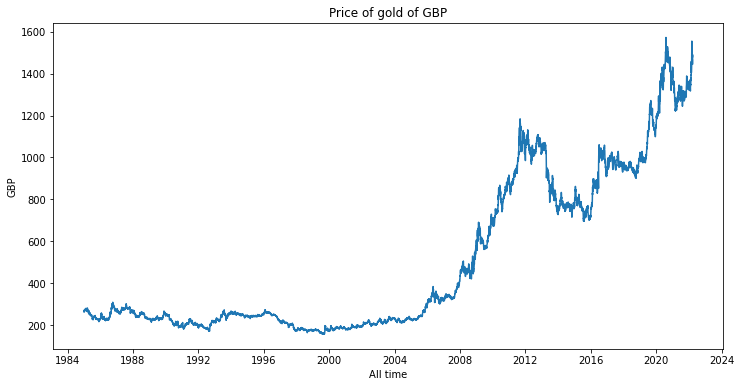

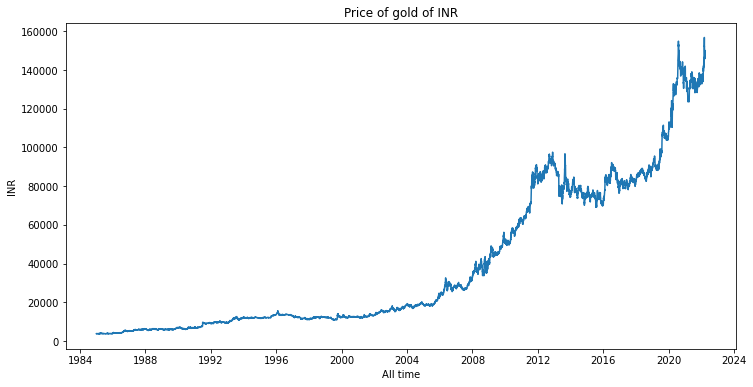

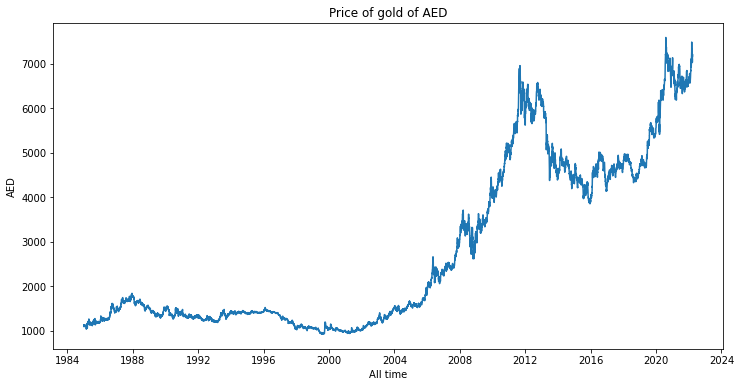

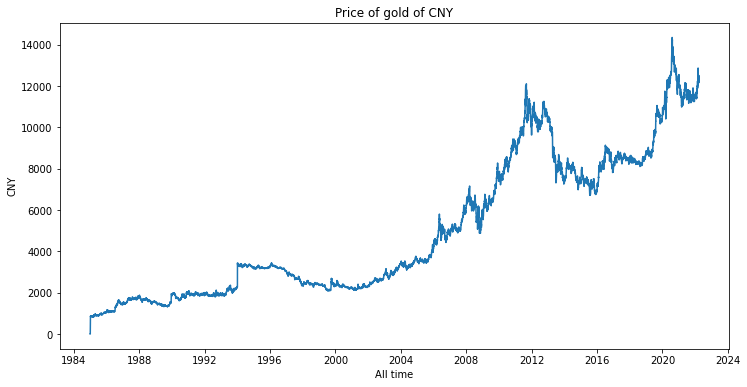

In [ ]:
currencies = ['USD', 'EUR', 'GBP','INR' , 'AED', 'CNY']
for i in currencies:
    plot_daily_sea_all(i)

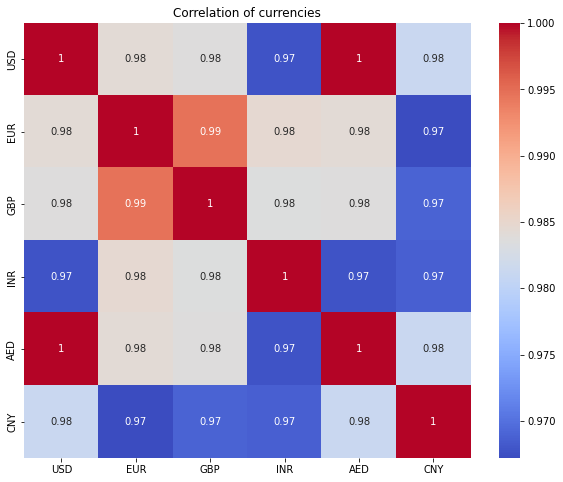

In [ ]:
# Daily
correlation = daily.corr()
f, ax = plt.subplots(figsize=(10,8))
plt.title('Correlation of currencies')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

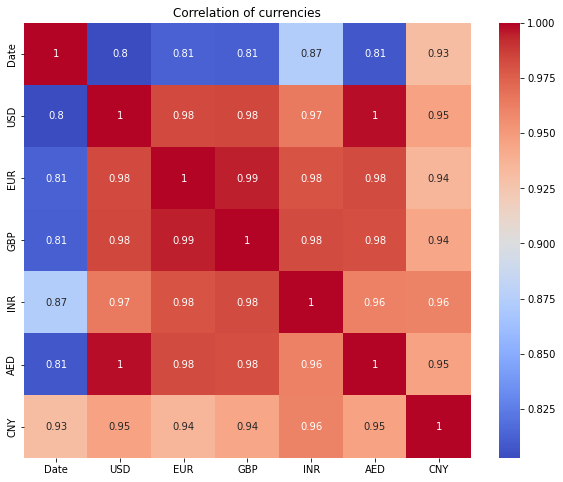

In [ ]:
# Annual
correlation = annual.corr()
f, ax = plt.subplots(figsize=(10,8))
plt.title('Correlation of currencies')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
!{sys.executable} -m pip install skforecast

     |████████████████████████████████| 87 kB 3.5 MB/s 
     |████████████████████████████████| 9.8 MB 18.0 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.63.0
    Uninstalling tqdm-4.63.0:
      Successfully uninstalled tqdm-4.63.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from joblib import dump, load
from xgboost import plot_importance, plot_tree

In [ ]:
drop = ['EUR', 'GBP','INR' , 'AED', 'CNY']
daily1 = daily.drop(drop, axis = 1)

In [ ]:
daily1

,Date,USD
0,1985-01-01,308.30
1,1985-01-02,305.50
2,1985-01-03,302.30
3,1985-01-04,303.15
4,1985-01-07,298.25
...,...,...
9709,2022-03-21,1935.05
9710,2022-03-22,1915.25
9711,2022-03-23,1931.75
9712,2022-03-24,1965.20


In [ ]:
print("60%: ",daily['Date'].quantile(0.60))
print("80%: ",daily['Date'].quantile(0.80))

60%:  2007-05-03 19:12:00
80%:  2014-10-14 09:36:00


In [ ]:
daily1 = daily1.set_index('Date')
daily1 = daily1.sort_index()

In [ ]:
train_date = '2007-05-03 19:12:00'
val_date = '2014-10-14 09:36:00'
train = daily1.loc[: train_date].copy()
val = daily1.loc[train_date:val_date].copy()
test = daily1.loc[val_date :].copy()

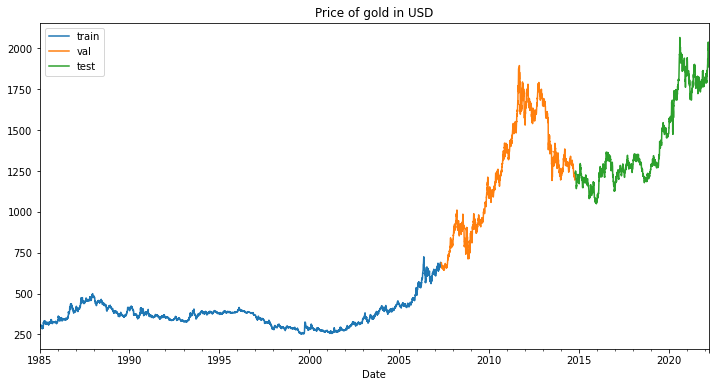

In [ ]:
# Plot time series
fig, ax = plt.subplots(figsize=(12, 6))
train.plot(y='USD', ax=ax, label='train')
val.plot(y='USD', ax=ax, label='val')
test.plot(y='USD', ax=ax, label='test')
ax.set_title('Price of gold in USD')
ax.legend();

In [ ]:
# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = xgb.XGBRegressor(random_state=123),
                lags = 24
                )

forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 123, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1} 
Creation date: 2022-04-06 12:49:07 
Last fit date: None 
Skforecast version: 0.4.3 

In [ ]:
# Grid search of hyperparameters and lags
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
    }

# # Lags used as predictors
lags_grid = [24, 48, 72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]

results_grid = grid_search_forecaster(
    forecaster         = forecaster,
    y                  = daily1.loc[:val_date, 'USD'], # Train and validation data
    param_grid         = param_grid,
    lags_grid          = lags_grid,
    steps              = 24,
    refit              = False,
    metric             = 'mean_squared_error',
    initial_train_size = int(len(train)), # Model is trained with training data
    fixed_train_size   = False,
    return_best        = True,
    verbose            = False
    )

Number of models compared: 48


loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[12:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                  | 1/12 [00:02<00:25,  2.35s/it]

[12:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████▏                              | 2/12 [00:10<00:59,  5.93s/it]

[12:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████▎                           | 3/12 [00:12<00:35,  3.96s/it]

[12:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████▎                        | 4/12 [00:19<00:42,  5.30s/it]

[12:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████▍                     | 5/12 [00:21<00:27,  3.98s/it]

[12:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████▌                  | 6/12 [00:31<00:36,  6.10s/it]

[12:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████▌               | 7/12 [00:32<00:22,  4.48s/it]

[12:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████▋            | 8/12 [00:37<00:18,  4.60s/it]

[12:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████▊         | 9/12 [00:39<00:11,  3.69s/it]

[12:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|██████████████████████████████      | 10/12 [00:47<00:09,  4.95s/it]

[12:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|█████████████████████████████████   | 11/12 [00:49<00:04,  4.31s/it]

[12:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[12:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                  | 1/12 [00:01<00:20,  1.91s/it]

[12:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████▏                              | 2/12 [00:10<00:58,  5.84s/it]

[12:50:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████▎                           | 3/12 [00:13<00:40,  4.48s/it]

[12:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████▎                        | 4/12 [00:27<01:06,  8.33s/it]

[12:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████▍                     | 5/12 [00:30<00:44,  6.37s/it]

[12:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████▌                  | 6/12 [00:50<01:05, 10.92s/it]

[12:51:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████▌               | 7/12 [00:52<00:39,  8.00s/it]

[12:51:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████▋            | 8/12 [01:01<00:33,  8.27s/it]

[12:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████▊         | 9/12 [01:04<00:19,  6.62s/it]

[12:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|██████████████████████████████      | 10/12 [01:18<00:18,  9.05s/it]

[12:51:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|█████████████████████████████████   | 11/12 [01:23<00:07,  7.83s/it]

[12:51:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[12:52:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                  | 1/12 [00:02<00:30,  2.75s/it]

[12:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████▏                              | 2/12 [00:15<01:24,  8.44s/it]

[12:52:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████▎                           | 3/12 [00:20<01:02,  6.90s/it]

[12:52:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████▎                        | 4/12 [00:40<01:35, 12.00s/it]

[12:53:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████▍                     | 5/12 [00:44<01:04,  9.16s/it]

[12:53:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████▌                  | 6/12 [01:12<01:33, 15.54s/it]

[12:53:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████▌               | 7/12 [01:14<00:56, 11.37s/it]

[12:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████▋            | 8/12 [01:27<00:47, 11.83s/it]

[12:53:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████▊         | 9/12 [01:31<00:28,  9.47s/it]

[12:53:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|██████████████████████████████      | 10/12 [01:53<00:26, 13.04s/it]

[12:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|█████████████████████████████████   | 11/12 [02:00<00:11, 11.28s/it]

[12:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[12:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                  | 1/12 [00:00<00:07,  1.56it/s]

[12:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████▏                              | 2/12 [00:02<00:16,  1.61s/it]

[12:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████▎                           | 3/12 [00:03<00:11,  1.26s/it]

[12:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████▎                        | 4/12 [00:07<00:17,  2.14s/it]

[12:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████▍                     | 5/12 [00:08<00:11,  1.67s/it]

[12:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████▌                  | 6/12 [00:12<00:16,  2.71s/it]

[12:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████▌               | 7/12 [00:13<00:10,  2.03s/it]

[12:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████▋            | 8/12 [00:15<00:08,  2.14s/it]

[12:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████▊         | 9/12 [00:16<00:05,  1.76s/it]

[12:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|██████████████████████████████      | 10/12 [00:20<00:04,  2.38s/it]

[12:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|█████████████████████████████████   | 11/12 [00:21<00:02,  2.09s/it]

[12:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop lags_grid: 100%|███████████████████████████████████████| 4/4 [06:10<00:00, 92.63s/it]


[12:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 486491.1618396155



In [ ]:
results_grid.head(10)

,lags,params,metric,learning_rate,max_depth,n_estimators
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",486491.161840,0.01,3.0,500.0
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",510063.626219,0.10,3.0,100.0
21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",515482.988558,0.10,5.0,500.0
37,"[1, 2, 3, 23, 24, 25, 71, 72, 73]","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",518393.851687,0.01,3.0,500.0
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",519608.274842,0.01,3.0,500.0
20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",522656.766306,0.10,5.0,100.0
33,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",524650.743193,0.10,5.0,500.0
23,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",527910.128949,0.10,10.0,500.0
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",528489.136754,0.10,3.0,500.0
32,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",532834.343515,0.10,5.0,100.0


In [ ]:
# Backtesting
metric, predictions = backtesting_forecaster(
    forecaster = forecaster,
    y          = daily1['USD'],
    initial_train_size = len(daily1.loc[:val_date]),
    fixed_train_size   = False,
    steps      = 24,
    refit      = False,
    metric     = 'mean_squared_error',
    verbose    = False # Change to True to see detailed information
)

[13:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(f"Backtest error: {metric}")

Backtest error: 12266.071829058372


In [ ]:
# Index is added to predictions
predictions.index = test.index

In [ ]:
predictions

,pred
Date,
2014-10-15,1228.988892
2014-10-16,1216.596313
2014-10-17,1209.793945
2014-10-20,1201.726929
2014-10-21,1197.365845
...,...
2022-03-21,1635.652954
2022-03-22,1635.652954
2022-03-23,1635.652954


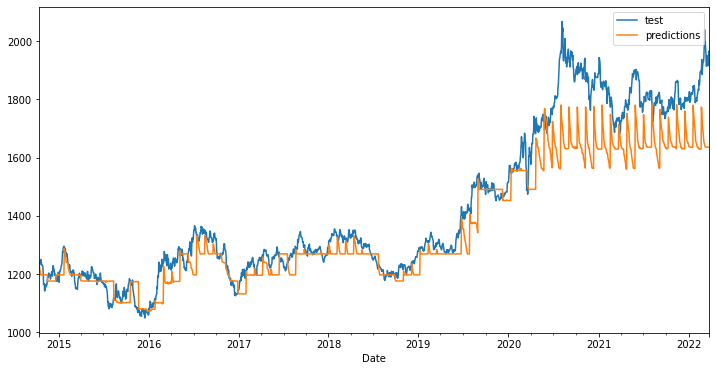

In [ ]:
# Plot of predictions
fig, ax = plt.subplots(figsize=(12, 6))
test['USD'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.legend();